# MLP Implementation

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/ad/ad.data", header=None, skipinitialspace=True, low_memory=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [4]:
%matplotlib inline

In [5]:
df = df.replace('?', np.nan)
df

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,NaN,NaN,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [6]:
df.dropna(inplace=True)
df.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1554    0
1555    0
1556    0
1557    0
1558    0
Length: 1559, dtype: int64

In [7]:
df[0] = df[0].astype(float)
df[1] = df[1].astype(float)
df[2] = df[2].astype(float)
df[3] = df[3].astype(int)
df.dtypes

0       float64
1       float64
2       float64
3         int32
4         int64
         ...   
1554      int64
1555      int64
1556      int64
1557      int64
1558     object
Length: 1559, dtype: object

In [8]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558_nonad.
0,125.0,125.0,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57.0,468.0,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.0,230.0,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,468.0,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = df.drop('1558_nonad.', axis=1)
y = df['1558_nonad.']

In [14]:
# helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return x * (x > 0)

def dRelu(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

def computeCost(y_hat, y):
    m = y.shape[0]
    loss = -1 * (np.log(y_hat) * y + (1 - y) * np.log(1 - y_hat))
    return np.sum(loss) / m

def computeAccuracy(y_hat, y):
    m = y.shape[0]
    _y = np.copy(y_hat)
    _y[_y >= 0.5] = 1
    _y[_y < 0.5] = 0
    return np.sum(_y == y) / m

def computeRecall(y_hat, y):
    truePositive = 0
    falseNegative = 0
    _y = np.copy(y_hat)
    _y[_y >= 0.5] = 1
    _y[_y < 0.5] = 0
    for i in range(len(y)):
        if _y[i] == 1 and y[i] == 1:
            truePositive += 1
        if y[i] == 1 and _y[i] == 0:
            falseNegative += 1
    return truePositive / (truePositive + falseNegative)

def computePrecision(y_hat, y):
    falsePositive = 0
    truePositive = 0
    _y = np.copy(y_hat)
    _y[_y >= 0.5] = 1
    _y[_y < 0.5] = 0
    for i in range(len(y)):
        if y[i] == 0 and _y[i] == 1:
            falsePositive += 1
        if _y[i] == 1 and y[i] == 1:
            truePositive += 1
    return truePositive / (truePositive + falsePositive)


In [11]:
class CustomMLP:

    # weight and bias
    W1, W2, b1, b2 = [], [], [], []

    #neurons
    A0, A1, A2, Z1, Z2 = [], [], [], [], []

    # loss values
    lW1, lW2, lb1, lb2, lZ1, lZ2, lA1 = [], [], [], [], [], [], []

    # momentum
    VW1, VW2, Vb1, Vb2 = [], [], [], []

    def __init__(self, n0, n1, n2):
        self.W1 = np.random.randn(n0, n1) * 0.01
        self.W2 = np.random.randn(n1, n2) * 0.01
        self.b1 = np.zeros(shape=(1, n1))
        self.b2 = np.zeros(shape=(1, n2))

        self.VW1 = np.zeros(shape=(n0, n1))
        self.Vb1 = np.zeros(shape=(1, n1))
        self.VW2 = np.zeros(shape=(n1, n2))
        self.Vb2 = np.zeros(shape=(1, n2))
        return

    def __setattr__(self, attrName, val):
        if hasattr(self, attrName):
            self.__dict__[attrName] = val
        else:
            raise Exception("self.%s note part of the fields" % attrName)

    def fprop(self, X):
        

        # A0 (1887, 1558)
        # W1 (1558, 10)
        # Z1 (1887, 10)

        # A1 (1887, 10)
        # W2 (1558, 1)
        self.A0 = X
            
        self.Z1 = np.dot(self.A0,self.W1)+self.b1
        self.A1 = relu(self.Z1)
            
        self.Z2 = np.dot(self.A1, self.W2)+self.b2
        self.A2 = sigmoid(self.Z2)
            
        y_hat = self.A2
        
        return y_hat

    def bprop(self, X, y):
        m = y.shape[0]
        
        self.lZ2 = self.A2 - y
        self.lW2 = 1/m * np.dot(np.transpose(self.A1), self.lZ2)
        self.lb2 = 1/m * np.sum(self.lZ2, axis=0)
        self.lA1 = np.dot(self.lZ2, np.transpose(self.W2))

        self.lZ1 = np.multiply(self.lA1, dRelu(self.Z1))
        self.lW1 = 1/m * np.dot(np.transpose(X), self.lZ1)
        self.lb1 = 1/m * np.sum(self.lZ1, axis=0)

    def gradientDescent(self, alpha):
        self.W1 = self.W1 - alpha * self.lW1
        self.b1 = self.b1 - alpha * self.lb1
        self.W2 = self.W2 - alpha * self.lW2
        self.b2 = self.b2 - alpha * self.lb2

    def M_momentum(self, alpha, beta):
        self.VW1 = beta * self.VW1.copy() + (1-beta)*self.lW1
        self.W1 = self.W1.copy() - alpha * self.VdW1

        self.Vb1 = beta * self.Vb1.copy() + (1-beta)*self.lb1
        self.b1 = self.b1.copy() - alpha * self.Vdb1

        self.VW2 = beta * self.VW2.copy() + (1-beta)*self.lW2
        self.W2 = self.W2.copy() - alpha * self.VW2

        self.Vb2 = beta * self.Vb2.copy() + (1-beta)*self.lb2
        self.b2 = self.b2.copy() - alpha * self.Vb2
    

In [12]:
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print(set(y))

# X is (m, n_0)
# y is (m,)

# --- Standardize data
#X = F_standardize(X)

# --- Split between training set and test set
# --- (m, n_0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# --- Convert to proper shape: (m,) -> (m, 1)
y_train = y_train.values.reshape((len(y_train), 1))
y_test = y_test.values.reshape((len(y_test), 1))

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X.shape: (2359, 1558)
y.shape: (2359,)
{0, 1}
X_train.shape: (1887, 1558)
y_train.shape: (1887, 1)
X_test.shape: (472, 1558)
y_test.shape: (472, 1)


In [45]:
# hyper parameters
n1 = 10 # number of hidden neurons
epoch = 120 # number of iterations
lr = 0.1 # learning rate
beta = 0.5 # momentum

cmlp = CustomMLP(X_train.shape[1], n1, 1)

train_cost, train_accuracy, test_cost, test_accuracy = [], [], [], []
recall_train, precision_train, recall_test, precision_test = [], [], [], []

for num_epoch in range(0, epoch):
    
    # --- Forward
    hat_y_train = cmlp.fprop(X_train)
    
    # --- Store results on train
    train_cost.append( computeCost(hat_y_train, y_train) )
    train_accuracy.append( computeAccuracy(hat_y_train, y_train) )
    recall_train.append(computeRecall(hat_y_train, y_train))
    precision_train.append(computePrecision(hat_y_train, y_train))

    # --- Backward
    cmlp.bprop(X_train, y_train)
    
    # --- Update
    cmlp.gradientDescent(lr)

    # --- Store results on test
    hat_y_test = cmlp.fprop(X_test)
    test_cost.append( computeCost(hat_y_test, y_test) )    
    test_accuracy.append( computeAccuracy(hat_y_test, y_test) )
    recall_test.append(computeRecall(hat_y_test, y_test))
    precision_test.append(computePrecision(hat_y_test, y_test))
    
    if (num_epoch % 20)==0: 
        print("epoch: {0:d} (cost: train {1:.2f} test {2:.2f}) (accuracy: train {3:.2f} test {4:.2f}) (recall: train {5:.2f} test {6:.2f}) (precision: train {7:.2f} test {8:.2f})".format(num_epoch, train_cost[-1], test_cost[-1], train_accuracy[-1], test_accuracy[-1], recall_train[-1], recall_test[-1], precision_train[-1], precision_test[-1]))


epoch: 0 (cost: train 0.68 test 0.65) (accuracy: train 0.83 test 0.85) (recall: train 1.00 test 1.00) (precision: train 0.83 test 0.85)
epoch: 20 (cost: train 0.56 test 0.54) (accuracy: train 0.83 test 0.85) (recall: train 1.00 test 1.00) (precision: train 0.83 test 0.85)
epoch: 40 (cost: train 0.50 test 0.48) (accuracy: train 0.83 test 0.85) (recall: train 1.00 test 1.00) (precision: train 0.83 test 0.85)
epoch: 60 (cost: train 0.47 test 0.45) (accuracy: train 0.83 test 0.85) (recall: train 1.00 test 1.00) (precision: train 0.83 test 0.85)
epoch: 80 (cost: train 0.46 test 0.44) (accuracy: train 0.83 test 0.85) (recall: train 1.00 test 1.00) (precision: train 0.83 test 0.85)
epoch: 100 (cost: train 0.45 test 0.43) (accuracy: train 0.83 test 0.85) (recall: train 1.00 test 1.00) (precision: train 0.83 test 0.85)


In [46]:
# learning rate 0.1
# hidden neurons 10
# beta 0.5
# iterations 120
# epoch: 120 (cost: train 0.45 test 0.42) (accuracy: train 0.83 test 0.85) (recall: train 1.00 test 1.00) (precision: train 0.83 test 0.85)

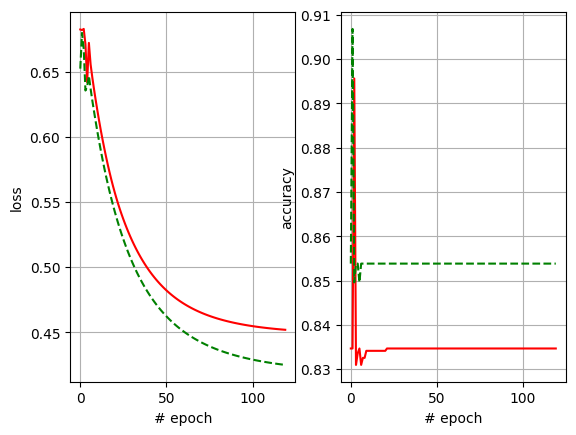

In [47]:
plt.subplot(1,2,1)
plt.plot(train_cost, 'r')
plt.plot(test_cost, 'g--')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r')
plt.plot(test_accuracy, 'g--')
plt.xlabel('# epoch')
plt.ylabel('accuracy')
plt.grid(True)

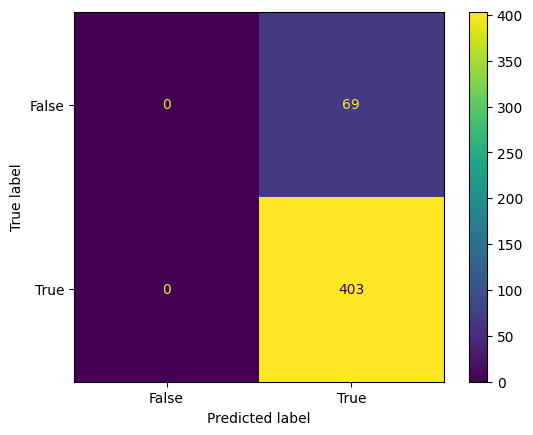

In [50]:
y_pred = np.copy(hat_y_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

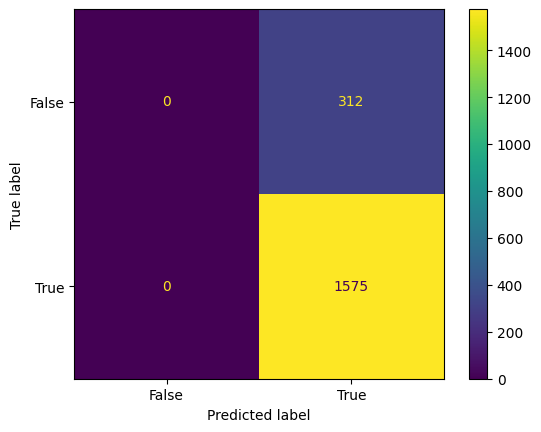

In [51]:
y_train_pred = np.copy(hat_y_train)
y_train_pred[y_train_pred >= 0.5] = 1
y_train_pred[y_train_pred < 0.5] = 0

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [53]:
from sklearn.metrics import f1_score

scoreTrain = f1_score(y_train, y_train_pred, average='binary')
scoreTest = f1_score(y_test, y_pred, average='binary')
print('F-Measure Test: %.3f' % scoreTest)
print('F-Measure Train: %.3f' % scoreTrain)


F-Measure Test: 0.921
F-Measure Train: 0.910
